## Module 2 Graded Quiz

***

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

# import pandas_profiling
# from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

#Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("bikeshare.csv", parse_dates=["dteday"])

In [3]:
df

,instant,dteday,weathersit,temp,atemp,hum,windspeed,cnt,month,day,year,day of week,quarter,days passed,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Weekend
0,1,2011-01-01,1,0.24,0.29,0.81,0.00,16,1,1,2011,6,1,0,0,0,0,0,0,1,1
1,2,2011-01-01,1,0.22,0.27,0.80,0.00,40,1,1,2011,6,1,0,0,0,0,0,0,1,1
2,3,2011-01-01,1,0.22,0.27,0.80,0.00,32,1,1,2011,6,1,0,0,0,0,0,0,1,1
3,4,2011-01-01,1,0.24,0.29,0.75,0.00,13,1,1,2011,6,1,0,0,0,0,0,0,1,1
4,5,2011-01-01,1,0.24,0.29,0.75,0.00,1,1,1,2011,6,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,2,0.26,0.26,0.60,0.16,119,12,31,2012,1,4,730,1,0,0,0,0,0,0
17375,17376,2012-12-31,2,0.26,0.26,0.60,0.16,89,12,31,2012,1,4,730,1,0,0,0,0,0,0
17376,17377,2012-12-31,1,0.26,0.26,0.60,0.16,90,12,31,2012,1,4,730,1,0,0,0,0,0,0
17377,17378,2012-12-31,1,0.26,0.27,0.56,0.13,61,12,31,2012,1,4,730,1,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   dteday       17379 non-null  datetime64[ns]
 2   weathersit   17379 non-null  int64         
 3   temp         17379 non-null  float64       
 4   atemp        17379 non-null  float64       
 5   hum          17379 non-null  float64       
 6   windspeed    17379 non-null  float64       
 7   cnt          17379 non-null  int64         
 8   month        17379 non-null  int64         
 9   day          17379 non-null  int64         
 10  year         17379 non-null  int64         
 11  day of week  17379 non-null  int64         
 12  quarter      17379 non-null  int64         
 13  days passed  17379 non-null  int64         
 14  Monday       17379 non-null  int64         
 15  Tuesday      17379 non-null  int64         
 16  Wedn

In [5]:
df.describe()

,instant,weathersit,temp,atemp,hum,windspeed,cnt,month,day,year,day of week,quarter,days passed,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Weekend
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,8690.00,1.43,0.50,0.48,0.63,0.19,189.46,6.54,15.68,2011.50,4.01,2.51,366.17,0.14,0.14,0.14,0.14,0.14,0.14,0.29
std,5017.03,0.64,0.19,0.17,0.19,0.12,181.39,3.44,8.79,0.50,2.00,1.11,210.07,0.35,0.35,0.35,0.35,0.35,0.35,0.45
min,1.00,1.00,0.02,0.00,0.00,0.00,1.00,1.00,1.00,2011.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4345.50,1.00,0.34,0.33,0.48,0.10,40.00,4.00,8.00,2011.00,2.00,2.00,184.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,8690.00,1.00,0.50,0.48,0.63,0.19,142.00,7.00,16.00,2012.00,4.00,3.00,366.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,13034.50,2.00,0.66,0.62,0.78,0.25,281.00,10.00,23.00,2012.00,6.00,4.00,548.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
max,17379.00,4.00,1.00,1.00,1.00,0.85,977.00,12.00,31.00,2012.00,7.00,4.00,730.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [6]:
df.columns

Index(['instant', 'dteday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'month', 'day', 'year', 'day of week', 'quarter', 'days passed', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Weekend'], dtype='object')

In [7]:
df[["windspeed","instant","hum","weathersit","atemp","cnt"]].corr()

,windspeed,instant,hum,weathersit,atemp,cnt
windspeed,1.00,-0.07,-0.29,0.03,-0.06,0.09
instant,-0.07,1.00,0.01,-0.01,0.14,0.28
hum,-0.29,0.01,1.00,0.42,-0.05,-0.32
weathersit,0.03,-0.01,0.42,1.00,-0.11,-0.14
atemp,-0.06,0.14,-0.05,-0.11,1.00,0.40
cnt,0.09,0.28,-0.32,-0.14,0.40,1.00


## Data Visualization

Which of the following independent variables has a positive relationship with the outcome variable (i.e., a positive slope)?

### Univariate Data Exploration

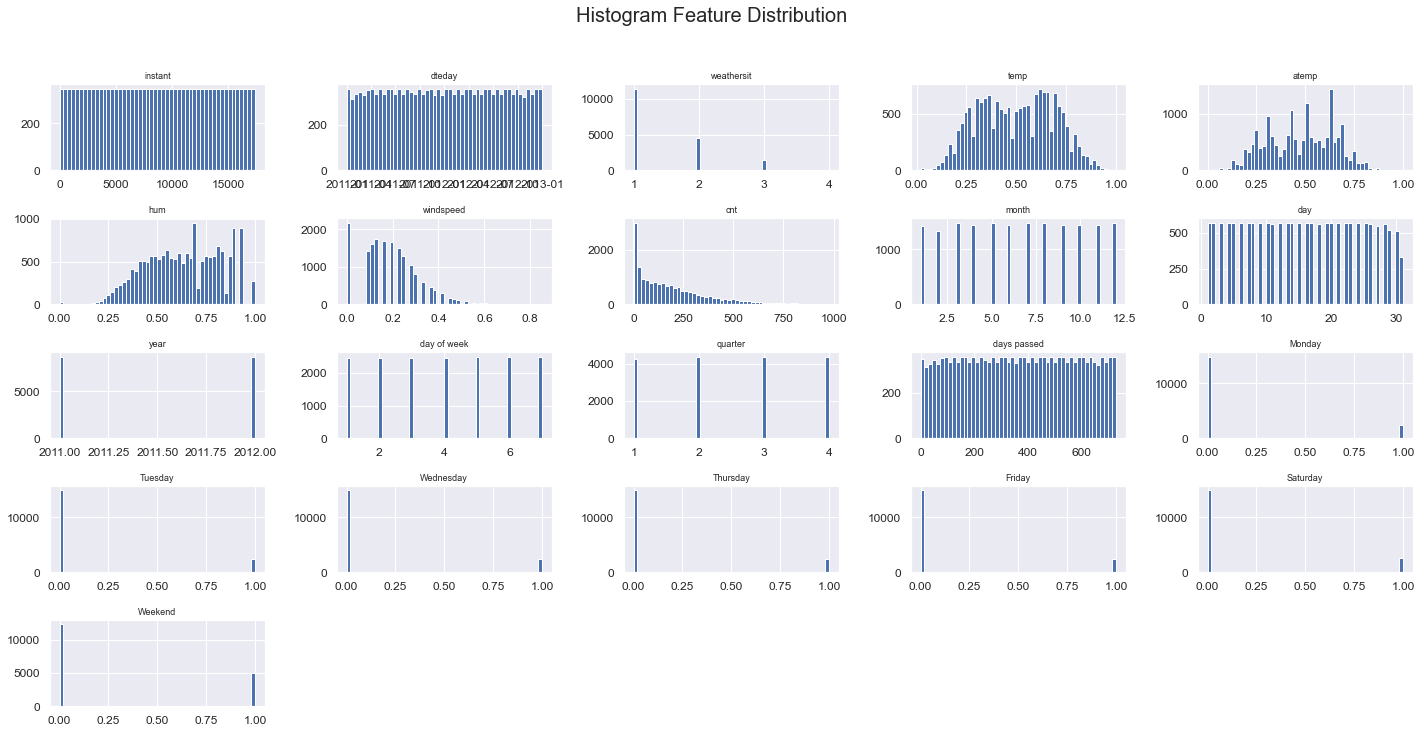

In [8]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

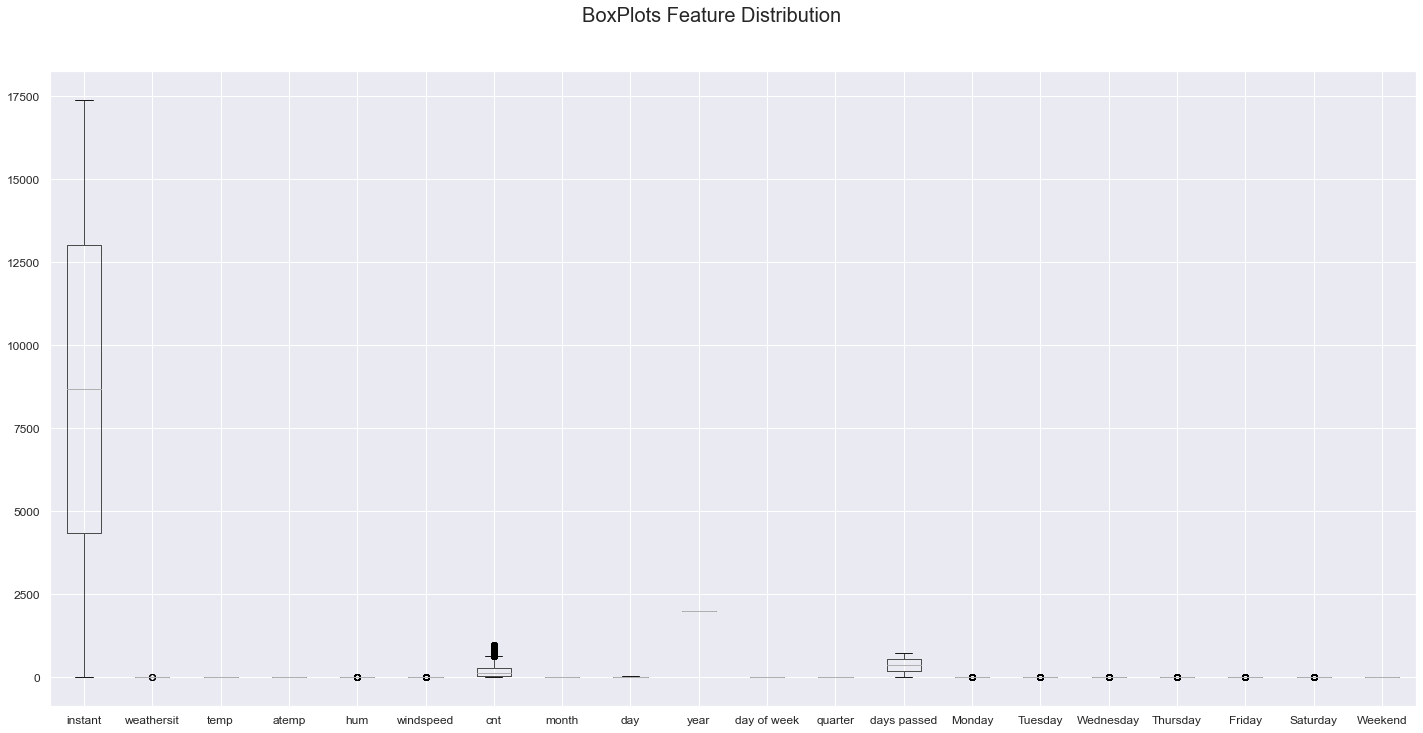

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

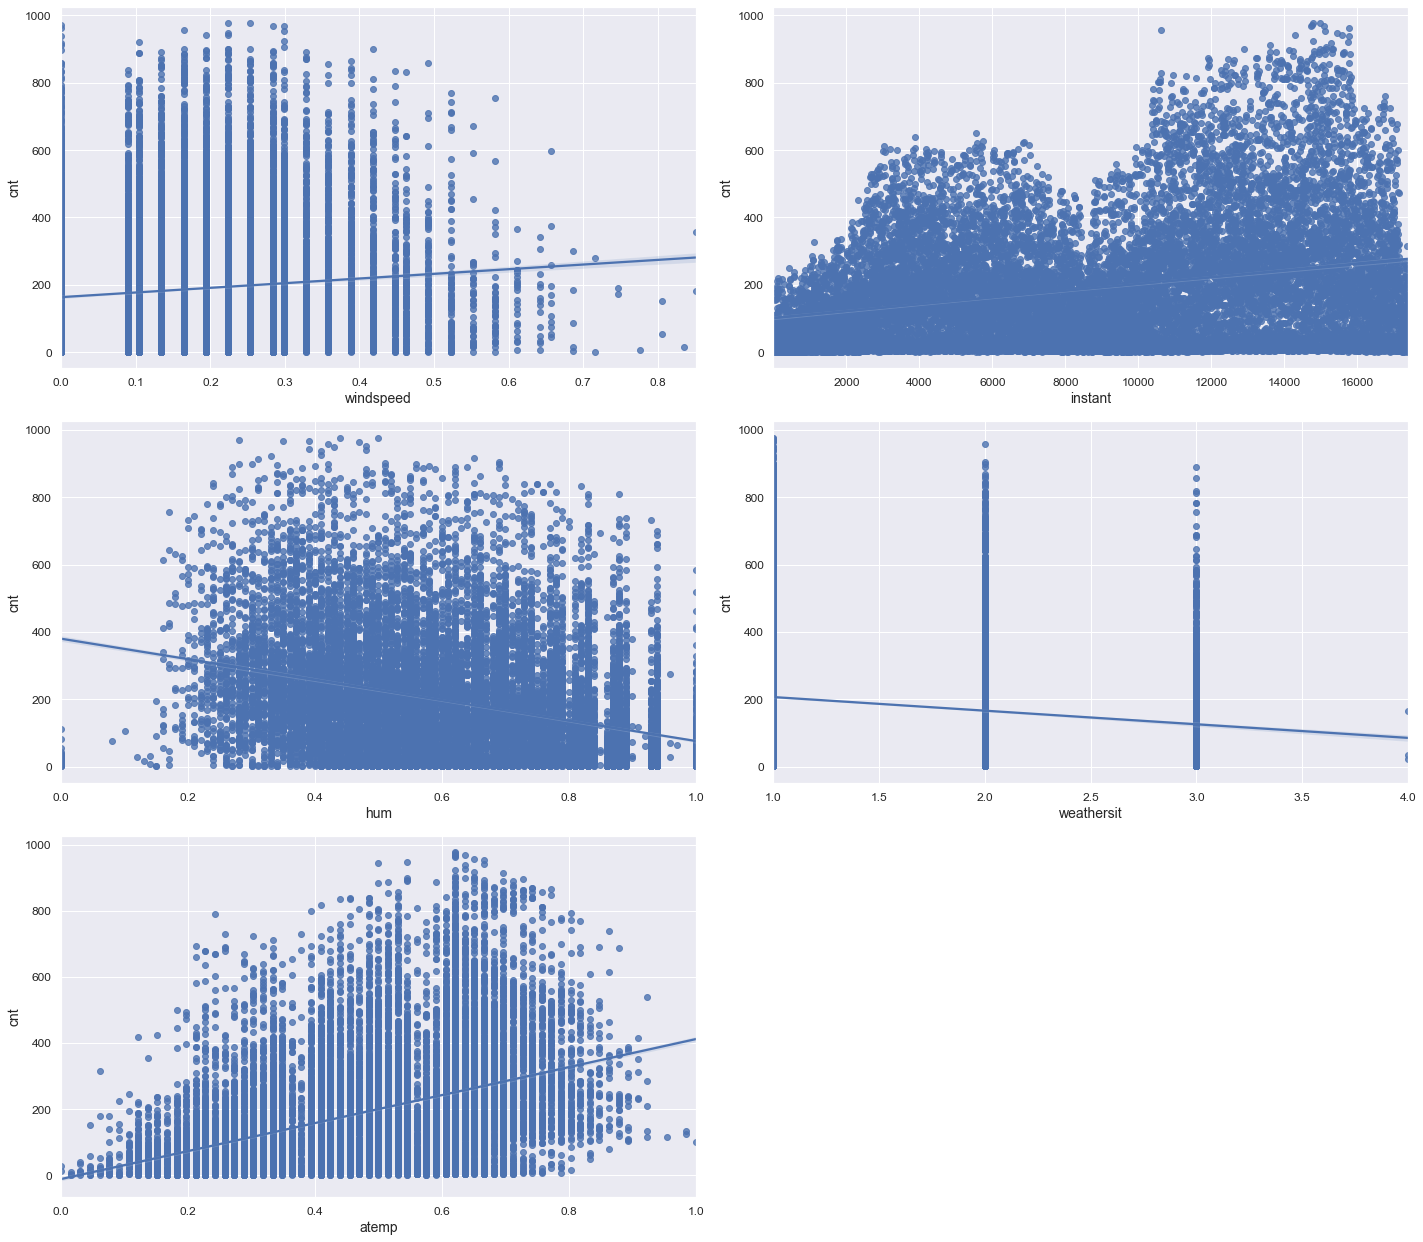

In [11]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("", size=20)
sns.regplot(x="windspeed", y="cnt", data=df)

plt.subplot(7,2,2)
plt.title("", size=20)
sns.regplot(x="instant", y="cnt", data=df)

plt.subplot(7,2,3)
plt.title("", size=20)
sns.regplot(x="hum", y="cnt", data=df)

plt.subplot(7,2,4)
plt.title("", size=20)
sns.regplot(x="weathersit", y="cnt", data=df)

plt.subplot(7,2,5)
plt.title("", size=20)
sns.regplot(x="atemp", y="cnt", data=df)

# plt.subplot(7,2,6)
# plt.title("", size=20)
# sns.regplot()



plt.tight_layout()
plt.show()

Based on the results of the regression, which among the following day-of-week variables is NOT significantly related to the outcome variable at the 0.05 level? 

In [12]:
linreg = smf.ols(formula='cnt ~ Monday + Tuesday + Wednesday + Thursday + Friday + Saturday', data=df).fit()

In [13]:
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.488
Date:                Mon, 05 Jul 2021   Prob (F-statistic):            0.00190
Time:                        13:14:09   Log-Likelihood:            -1.1503e+05
No. Observations:               17379   AIC:                         2.301e+05
Df Residuals:                   17372   BIC:                         2.301e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    177.4688      3.625     48.960      0.000     170.364     184.574
Monday         6.2758      5.138      1.221      0.222      -3.795      16.347
Tuesday       13.7701      5.152      2.673      0.008       3.672      23.868
Wednesday     13.6617      5.140      2.658      0.008       3.587      23.737
Thursday      18.9678      5.142      3.689      0.000       8.889      29.047
Friday        18.6671      5.134      3.636      0.000       8.604      28.730
Saturday      12.7410      5.121      2.488      0.013       2.703      22.779
==============================================================================
Omnibus:                     3444.493   Durbin-Watson:                   0.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6128.536
Skew:                           1.275   Prob(JB):                         0.00
Kurtosis:                       4.401   Cond. No.                         7.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Python code done by Dennis Lam